In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
def get_wave_number(kstart=.1, kend=.4, nk=30):
    string = \
f'''
&wavenumber
kstart = {kstart}
kend = {kend}
nk = {nk}
/
'''
    return string

def get_initial_guess(omega_r=0., omega_i=.013, increment_r=1e-5, increment_i=3e-3):
    string = \
f'''
&initial_guess
omega_r = {omega_r}
omega_i = {omega_i}
increment_r = {increment_r}
increment_i = {increment_i}
/
'''
    return string

def get_setup(nspecies=2, theta=45., delta=1e-5):
    string = \
f'''
&setup
Nspecies = {nspecies}
theta = {theta}
delta = {delta}
/
'''
    return string

def get_accuracy(rf_error=1e-3, eps_error=1e-6):
    string = \
f'''
&accuracy
rf_error = {rf_error}
eps_error = {eps_error}
/
'''
    return string

def get_species(q_in=1., mu_in=1., dens_in=1., drift_in=0., beta_para_in=4., beta_perp_in=2., kappa_in=7.):
    string = \
f'''
&species
q_in = {q_in}
mu_in = {mu_in}
dens_in = {dens_in}
drift_in = {drift_in}
beta_para_in = {beta_para_in}
beta_perp_in = {beta_perp_in}
kappa_in = {kappa_in}
/
'''
    return string

def write_input_data(input_file_name="input.dat"):
    with open(input_file_name,"w") as f:
    f.write(input_file_text)
    
def read_disp_data(dispersion_file_name="omega.dat"):
    return pd.read_csv(dispersion_file_name, sep='\s+', names=['k', 'wr', 'wi'])

In [50]:
kstart = .1
kend = .4
nk = 30
omega_r = 0.
omega_i = .013

nspecies = 2
theta = 45

q_in = [1., -1.]
mu_in = [1., 1836.]
dens_in = [1., 1.]
drift_in = [0., 0.]
beta_para_in = [4., 1.]
beta_perp_in = [2., 1.]
kappa_in = [7, 200]

input_file_text = ''
input_file_text += get_wave_number(kstart, kend, nk)
input_file_text += get_initial_guess(omega_r=omega_r, omega_i=omega_i)
input_file_text += get_setup(nspecies=nspecies, theta=theta)
input_file_text += get_accuracy()

for j in range(len(q_in)):
    input_file_text += get_species(
        q_in=q_in[j],
        mu_in=mu_in[j],
        dens_in=dens_in[j],
        drift_in=drift_in[j],
        beta_para_in=beta_para_in[j],
        beta_perp_in=beta_perp_in[j],
        kappa_in=kappa_in[j],
    )


In [1]:
!dsolve

/bin/sh: dsolve: command not found


In [63]:
df = pd.read_csv('omega.dat', sep='\s+', names=['k', 'wr', 'wi'])

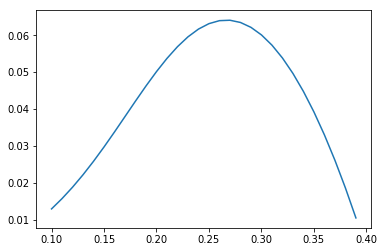

In [68]:
plt.plot(df.k, df.wi)